# LeNet

本文用torch复现LeNet。 

任务：识别Mnist手写数字。

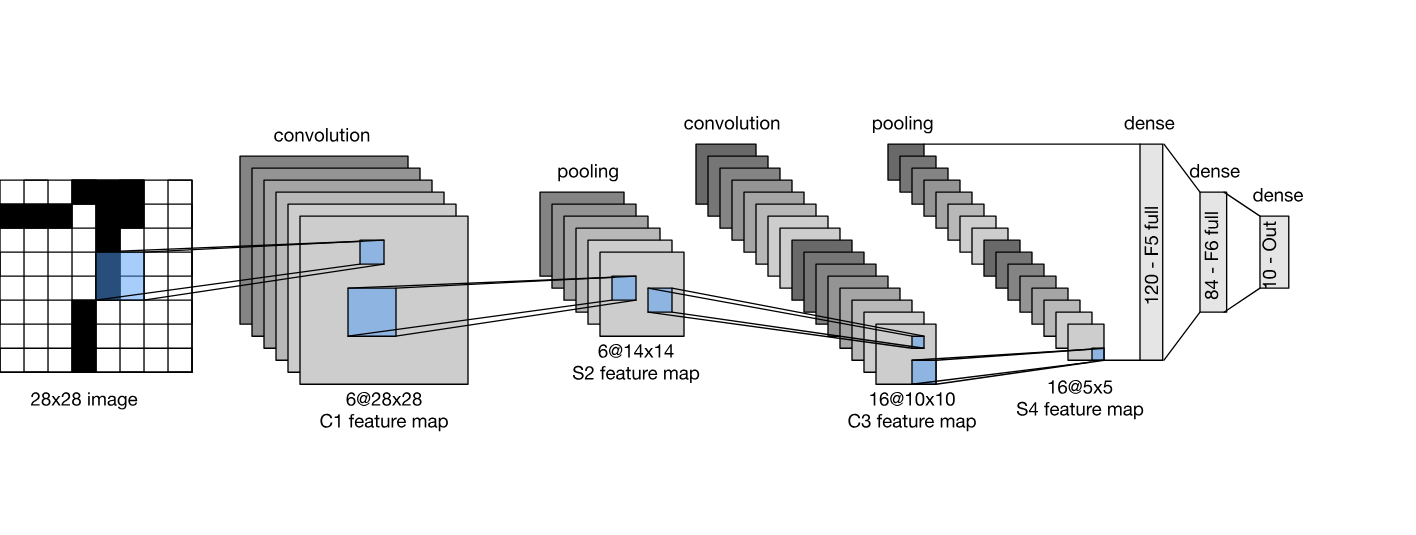

In [1]:
# 对__call__作用的解释。
class Adder:
    def __init__(self, n):
        self.n = n

    def __call__(self, x):
        return x + self.n

add_5 = Adder(5)
print(add_5(10))  # 相当于 add_5.__call__(10)，输出 15

15


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
type(nn.Linear(2,3)), type(nn.LazyConv2d(2,3))

(torch.nn.modules.linear.Linear, torch.nn.modules.conv.LazyConv2d)

In [4]:
def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10): 
        super().__init__() 
        self.save_hyperparameters()
        self.net = nn.Sequential(
                nn.LazyConv2d(out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(2,2)),
                nn.Sigmoid(), 
                nn.AvgPool2d((2,2)), 
                nn.LazyConv2d(out_channels=16, kernel_size=(5,5), stride=(1,1)),
                nn.Sigmoid(), 
                nn.AvgPool2d((2,2)), 
                nn.Flatten(), 
                nn.LazyLinear(120),nn.Sigmoid(),
                nn.LazyLinear(84),nn.Sigmoid(),
                nn.LazyLinear(num_classes)
            )
        
    def forward(self, X):
        return self.net(X)
    

In [5]:
@d2l.add_to_class(d2l.Classifier)  #@save
def layer_summary(self, X_shape):
    '''
    tool printf func: 用来检视中间表示层的shape，
    for layer in self.net：是一个很常用的迭代器！
    my_function.__name__
    my_variable.__class__.__name__
    '''
    X = torch.randn(*X_shape)
    print(f'type(self.net): {type(self.net)}')
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

type(self.net): <class 'torch.nn.modules.container.Sequential'>
Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


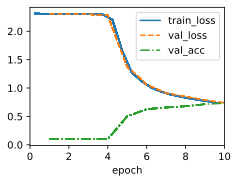

In [6]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)